# REINFORCE Íµ¨ÌòÑ

## `Gymnaisum` ÏÇ¨Ïö©Î≤ï

Î®ºÏ†Ä Í∞ïÌôîÌïôÏäµ ÏΩîÎî©Ïù¥ Ï≤òÏùåÏù∏ Î∂ÑÎì§ÏóêÍ≤åÎäî ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÌôòÍ≤ΩÍ≥º ÏÉÅÌò∏ÏûëÏö©ÌïòÎäî Í≤ÉÎ∂ÄÌÑ∞ Ïñ¥ÎñªÍ≤å Íµ¨ÌòÑÌï¥Ïïº Ìï†ÏßÄ ÎßâÎßâÌï† Í≤ÉÏù¥Îã§. `Gymnaisum`ÏùÄ Îã§ÏñëÌïú Ïó∞ÏäµÏö© ÌôòÍ≤ΩÏùÑ Ï†úÍ≥µÌïòÍ≥† ÏûàÏúºÎ©∞, Í∞ïÌôîÌïôÏäµ Ïó∞Íµ¨ÏûêÎì§ÏóêÍ≤å ÌôòÍ≤ΩÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌïú ÏùºÏ¢ÖÏùò ÏïΩÏÜç (convention)ÏùÑ Ï†úÍ≥µÌïòÍ≥† ÏûàÎã§. Ïù¥Î≤à Ï†àÏóêÏÑú `Gymnaisum`ÏóêÏÑú Ï†úÍ≥µÌïòÍ≥† ÏûàÎäî CartPole ÌôòÍ≤ΩÏùÑ ÏÇ¨Ïö©Ìï¥Î≥º Í≤ÉÏù¥Îã§.

<br>

Î®ºÏ†Ä Ïã§ÏäµÏóê ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î™®Îëê ÏûÑÌè¨Ìä∏ ÌïòÏûê.


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import gymnasium as gym
import matplotlib.pyplot as plt

from torch.distributions import Normal

<br>

`gymnasium.make('ÌôòÍ≤ΩÏù¥Î¶Ñ')`ÏùÑ ÌÜµÌï¥ ÌôòÍ≤ΩÏùÑ Î∂àÎü¨Ïò¨ Ïàò ÏûàÎã§. `Gymnasium`ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌôòÍ≤ΩÏùò Î™©Î°ùÏùÄ `Gymnasium`Ïùò [Í≥µÏãù Î¨∏ÏÑú](https://gymnasium.farama.org/environments/classic_control/)Ïóê Ïûò ÎÇòÏôÄ ÏûàÎã§.

In [2]:
env = gym.make('CartPole-v1')

<br>

ÌôòÍ≤Ω Ï¥àÍ∏∞ÌôîÎäî `env.reset()` Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ìï† Ïàò ÏûàÎã§. Ï¥àÍ∏∞ ÏÉÅÌÉú $s_0 \sim \rho_0$Ïóê ÎåÄÏùëÌïòÎäî ÏΩîÎìúÏù¥Îã§. Ïù¥ Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïòÎ©¥ ÌôòÍ≤ΩÏùò Ï¥àÍ∏∞ ÏÉÅÌÉúÏôÄ Ï£ºÎ°ú ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÏßÄÎäî ÏïäÏßÄÎßå ÏÇ¨Ïö©ÏûêÍ∞Ä ÏïåÎ©¥ Ï¢ãÏùÄ Ï∂îÍ∞Ä Ï†ïÎ≥¥Î•º Î∞òÌôòÌï¥Ï§ÄÎã§.


In [3]:
s, info = env.reset()

print("Initial state is: ", s)
print("Information: ", info)

Initial state is:  [ 0.02261854 -0.01937856  0.04792569  0.04927012]
Information:  {}


<br>

ÌôòÍ≤ΩÏùò ÏÉÅÌÉúÎ•º Í¥ÄÏ∞∞ÌïòÏòÄÏúºÎãà, ÏïÑÎ¨¥ ÌñâÎèôÏùÑ ÎΩëÏïÑÏÑú ÌôòÍ≤ΩÏóê ÌñâÎèôÏùÑ Ï∑®Ìï¥Î≥¥Ïûê. `env.action_space.sample()`ÏùÄ ÌñâÎèô Í≥µÍ∞ÑÏóêÏÑú ÏûÑÏùòÏùò ÌñâÎèô ÌïòÎÇòÎ•º Î∞òÌôòÌï¥Ï£ºÎäî Î©îÏÑúÎìúÏù¥Îã§. Îã§ÏùåÏúºÎ°ú `env.step(action)`ÏùÑ ÌÜµÌï¥ ÌôòÍ≤ΩÏóê ÌñâÎèôÏùÑ Ï∑®Ìï† Ïàò ÏûàÎã§. `env.step(action)`ÏùÄ 5-tupleÏù∏ `(s_prime, r, terminated, truncated, info)`ÏùÑ Î∞òÌôòÌï¥Ï§ÄÎã§.
- `s_prime`: Îã§Ïùå ÏÉÅÌÉú
- `r`: Î≥¥ÏÉÅ
- `terminated`: ÌôòÍ≤ΩÏù¥ Ï¢ÖÎ£å Ï°∞Í±¥Ïóê ÏùòÌï¥ Ï¢ÖÎ£åÎêòÏóàÎäîÏßÄ Ïó¨Î∂Ä
- `truncated`: ÌôòÍ≤ΩÏù¥ ÏµúÎåÄ ÏÉÅÌò∏ÏûëÏö© ÌöüÏàòÏóê ÎèÑÎã¨ÌïòÏó¨ Ï¢ÖÎ£åÎêòÏóàÎäîÏßÄ Ïó¨Î∂Ä
- `info`: Ï∂îÍ∞Ä Ï†ïÎ≥¥


In [4]:
# Choose a random action
a = env.action_space.sample()  

# Take the action
s_prime, r, terminated, truncated, info =  env.step(a)

print("Next state: ", s_prime)
print("Reward: ", r)
print("Is terminated? ", terminated)
print("Is truncated? ", truncated)
print("Information: ", info)

Next state:  [ 0.02223097 -0.2151538   0.04891109  0.35668054]
Reward:  1.0
Is terminated?  False
Is truncated?  False
Information:  {}


```{note}
`terminated`ÏôÄ `truncated`ÏùÄ Îëò Îã§ ÌôòÍ≤ΩÏù¥ Ï¢ÖÎ£åÎêòÏóàÎäîÏßÄ Ïó¨Î∂ÄÎ•º Î∞òÌôòÌï¥Ï§ÄÎã§. Îã®, `terminated`ÏùÄ Ï¢ÖÎ£å Ï°∞Í±¥Ïóê ÏùòÌï¥ ÌôòÍ≤ΩÏù¥ Ï¢ÖÎ£åÎêòÏóàÏùÑ Îïå `True`Î•º Î∞òÌôòÌïúÎã§. Ï¢ÖÎ£å Ï°∞Í±¥Ïùò ÏòàÏãúÎäî Ï£ºÎ°ú ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Î™©Ï†ÅÏùÑ Îã¨ÏÑ±ÌñàÍ±∞ÎÇò, ÏÇ¨ÎßùÏù¥ÎÇò Î∂ïÍ¥¥ Îì± ÎèåÏù¥ÌÇ¨ Ïàò ÏóÜÎäî ÏÉÅÌÉúÏóê Îπ†Ï°åÏùÑ Í≤ΩÏö∞Î•º ÏùòÎØ∏ÌïúÎã§. `truncated`ÏùÄ Ï£ºÎ°ú ÌôòÍ≤ΩÏùò Ï¢ÖÎ£å Ï°∞Í±¥Ïù¥ Îî∞Î°ú ÏóÜÎäî Í≤ΩÏö∞ÏóêÎßå ÏùòÎØ∏Í∞Ä ÏûàÎã§. Î°úÎ¥á ÌÜµÏ†úÏôÄ Í∞ôÏùÄ Î¨¥ÌïúÌûà ÏÉÅÌò∏ÏûëÏö©Ìï† Ïàò ÏûàÎäî ÌôòÍ≤ΩÏùò Í≤ΩÏö∞, Ïã§Ï†ú Íµ¨ÌòÑÏóêÏÑúÎäî ÌèâÏÉù ÏÉÅÌò∏ÏûëÏö©Ìï† Ïàò ÏóÜÏúºÎãà 1000Ìöå Ï†ïÎèÑ ÏÉÅÌò∏ÏûëÏö© ÌõÑ ÌôòÍ≤ΩÏùÑ ÎßàÏπúÎã§. Ïù¥Ï≤òÎüº ÏµúÎåÄ ÏÉÅÌò∏ÏûëÏö© ÌöüÏàòÏóê ÎèÑÎã¨ÌïòÏó¨ ÌôòÍ≤ΩÏù¥ Ï¢ÖÎ£åÎêú Í≤ΩÏö∞ `truncated`ÏôÄ `True`Î•º Î∞òÌôòÌïúÎã§ 
```

<br>

ÏúÑÏùò ÎÇ¥Ïö©ÏùÑ Ï¢ÖÌï©ÌïòÎ©¥, Ìïú ÏóêÌîºÏÜåÎìú ÏßÑÌñâÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Íµ¨ÌòÑÌïúÎã§.

In [5]:
s, terminated, truncated, ret = env.reset(), False, False, 0
while not (terminated or truncated):
    a = env.action_space.sample()
    s_prime, r, terminated, truncated, _ = env.step(a)
    
    ret += r
    s = s_prime
print("Return: ", ret)

Return:  20.0


<br>

---

## Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞Ñ

### Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÌòÑ

Îã§ÏùåÏúºÎ°ú Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Ï†ïÏùòÌï¥Î≥¥Ïûê. Ï†ïÏ±ÖÏùÄ Ï£ºÏñ¥ÏßÑ ÏÉÅÌÉú $s$ÏóêÏÑú ÌñâÎèô $a$Î•º Ï∑®Ìïú Ï°∞Í±¥Î∂Ä ÌôïÎ•† $\text{Pr}\left[A=a|S=s \right]$Ïù¥Îã§. 
Í∞Å ÏÉÅÌÉú $s$ÎßàÎã§ Ï°∞Í±¥Î∂Ä ÌôïÎ•† Î∂ÑÌè¨Í∞Ä Ï†ïÏùòÎêòÏñ¥Ïïº ÌïòÎØÄÎ°ú Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Îäî ÏÉÅÌÉúÎ•º ÏûÖÎ†• Î∞õÎäîÎã§. Í∑∏Î¶¨Í≥† ÌñâÎèôÏóê ÎåÄÌïú ÌôïÎ•† Î∂ÑÌè¨Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞Å ÌñâÎèôÏóê ÌôïÎ•†ÏùÑ Î∂ÄÏó¨Ìï¥Ïïº ÌïúÎã§.

CartPole ÌôòÍ≤ΩÏùÄ 4Ï∞®Ïõê ÌñâÎèôÏùÑ ÏûÖÎ†• Î∞õÍ≥† 2Í∞ÄÏßÄ ÌñâÎèô Ï§ë ÏÑ†ÌÉùÌïòÎäî Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞ÑÏùÑ Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê 4Ï∞®Ïõê Î≤°ÌÑ∞Î•º ÏûÖÎ†• Î∞õÍ≥† 2Ï∞®Ïõê Î≤°ÌÑ∞Î•º Ï∂úÎ†•ÌïòÎäî Îã§Ï∏µÌçºÏÖâÌä∏Î°† (MLP)Î°ú Ï†ïÏùòÌïòÎêò, Ï∂úÎ†•Ïù¥ ÌôïÎ•† Î∂ÑÌè¨Î°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎèÑÎ°ù Ï∂úÎ†•Ïóê softmax Ìï®ÏàòÎ•º ÏîåÏö∏ Í≤ÉÏù¥Îã§. Ïù¥ MLP ÎÇòÏ§ëÏóê Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÏúÑÌï¥ÏÑú Îã§ÏÜå ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏΩîÎìúÎ•º Ïß∞Îã§. ÏùºÎ∞òÏ†ÅÏù¥ÎùºÎäî ÏùòÎØ∏Îäî ÏÇ¨Ïö©ÏûêÏùò ÏàòÏöîÏóê ÎßûÍ≤å ÌûàÎì†Î†àÏù¥Ïñ¥ Í∞úÏàò Î∞è ÎÖ∏Îìú ÏàòÎ•º Ï°∞Ï†ïÌï† Ïàò ÏûàÍ≥† ÌôúÏÑ±Ìôî Ìï®ÏàòÎèÑ ÏÑ§Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù ÎßåÎì§ÏóàÎã§.

In [6]:
class MLPDiscretePolicy(nn.Module):
    def __init__(self, dim_state, dim_action, dim_hiddens=(512, ), activation_fn=F.relu):
        super(MLPDiscretePolicy, self).__init__()
        self.input_layer = nn.Linear(dim_state, dim_hiddens[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(dim_hiddens) - 1):
            hidden_layer = nn.Linear(dim_hiddens[i], dim_hiddens[i+1])
            self.hidden_layers.append(hidden_layer)
        self.output_layer = nn.Linear(dim_hiddens[-1], dim_action)
        self.activation_fn = activation_fn

    def forward(self, s):
        s = self.activation_fn(self.input_layer(s))
        for hidden_layer in self.hidden_layers:
            s = self.activation_fn(hidden_layer(s))
        prob = F.softmax(self.output_layer(s), dim=-1)

        return prob

<br>

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Îã§ÏùåÍ≥º Í∞ôÏù¥ ÏÑ†Ïñ∏Ìï† Ïàò ÏûàÎã§.

In [7]:
env = gym.make('CartPole-v1')

dim_state = env.observation_space.shape[0]
dim_action = env.action_space.n
dim_hiddens = (128, 128)
activation_fn = F.relu

policy = MLPDiscretePolicy(dim_state, dim_action, dim_hiddens, activation_fn)
policy

MLPDiscretePolicy(
  (input_layer): Linear(in_features=4, out_features=128, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
  )
  (output_layer): Linear(in_features=128, out_features=2, bias=True)
)

<br>

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê ÏÉÅÌÉú ÌïòÎÇòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï∂úÎ†•ÎêúÎã§. Í≤∞Í≥ºÎ°ú ÎÇòÏò® Î≤°ÌÑ∞Ïùò Í∞Å ÏõêÏÜåÎäî Í∞Å ÌñâÎèôÏùÑ Ï∑®Ìï† ÌôïÎ•†Î°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.

In [8]:
s, _ = env.reset()
s = torch.as_tensor(s, dtype=torch.float)

policy(s)

tensor([0.5359, 0.4641], grad_fn=<SoftmaxBackward0>)

<br>

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î°ú ÎßåÎì† ÌôïÎ•† Î∂ÑÌè¨ÏóêÏÑú ÌñâÎèôÏùÑ ÏÉòÌîåÎßÅÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ìï† Ïàò ÏûàÎã§.

In [9]:
prob = policy(s)
a = torch.multinomial(prob, num_samples=1)
print("Selected action : ", a.item())

Selected action :  1


<br>

### ÏóêÏù¥Ï†ÑÌä∏ Íµ¨ÌòÑ

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä Ï§ÄÎπÑÎêòÏóàÏúºÎãà REINFORCE ÏóêÏù¥Ï†ÑÌä∏Î•º ÎßåÎì§Ïñ¥Î≥¥Ïûê. REINFORCE ÏóêÏù¥Ï†ÑÌä∏Îäî Ï¥ù 4Í∞ú Î©îÏÑúÎìúÍ∞Ä ÏûàÎã§. 
- `__init__()`: ÏóêÏù¥Ï†ÑÌä∏ ÌÅ¥ÎûòÏä§Í∞Ä ÏûÖÎ†• Î∞õÏùÑ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏûÖÎ†• Î∞õÍ≥† Ïó¨Îü¨Í∞ÄÏßÄ Ï¥àÍ∏∞ÌôîÎ•º ÏàòÌñâÌïúÎã§.
- `act()`: ÌôòÍ≤ΩÍ≥ºÏùò ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÏúÑÌïú Î©îÏÑúÎìúÎ°úÏÑú ÏÉÅÌÉú ÌïòÎÇòÎ•º ÏûÖÎ†• Î∞õÏïÑ ÌñâÎèôÏùÑ Ï∂úÎ†•ÌïúÎã§.
- `learn()`: ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Í∞ñÍ≥† ÏûàÎäî ÎÑ§Ìä∏ÏõåÌÅ¨Îì§ÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï¥Ï§ÄÎã§.
- `process()`: ÌôòÍ≤ΩÍ≥ºÏùò Îß§ ÏÉÅÌò∏ÏûëÏö©ÎßàÎã§ ÏàòÌñâÌï† Î©îÏÑúÎìúÏù¥Îã§. Ï£ºÎ°ú transitionÏùÑ Î≤ÑÌçºÏóê Ï†ÄÏû•ÌïòÍ≥†, ÌäπÏ†ï Ï£ºÍ∏∞Î°ú `learn()` Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïúÎã§.

Ïù¥ Î©îÏÑúÎìú Íµ¨ÏÑ±ÏùÄ Ïπ¥Ïπ¥Ïò§ ÏóîÌÑ∞ÌîÑÎùºÏù¥Ï¶àÏùò Í∞ïÌôîÌïôÏäµ ÎùºÏù¥Î∏åÎü¨Î¶¨ [JORLDY](https://github.com/kakaoenterprise/JORLDY)Î•º Ï∞∏Í≥†ÌïòÏó¨ ÎßåÎì§ÏóàÎã§. Ïù¥ÌõÑ Íµ¨ÌòÑÌï† ÏïåÍ≥†Î¶¨Ï¶òÎì§ÎèÑ ÎèôÏùºÌïú Î©îÏÑúÎìú Íµ¨ÏÑ±ÏùÑ Í∞ñÍ≥† ÏûàÎã§. ÏïåÍ≥†Î¶¨Ï¶òÎßàÎã§ Í∞Å Î©îÏÑúÎìúÍ∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÌòÑÎêòÎäîÏßÄÏóê Ï¥àÏ†êÏùÑ ÎßûÏ∂∞ ÎπÑÍµêÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÎã§.

In [10]:
class REINFORCE:
    def __init__(self, policy, gamma=0.99, lr=0.001):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.policy = policy.to(self.device)
        self.gamma = gamma
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)
        self.buffer = []
        
    @torch.no_grad()
    def act(self, s, training=True):
        self.policy.train(training)

        s = torch.as_tensor(s, dtype=torch.float, device=self.device)
        prob = self.policy(s)
        a = torch.multinomial(prob, 1) if training else torch.argmax(prob, dim=-1, keepdim=True)

        return a.cpu().numpy()

    def learn(self):
        self.policy.train()
        s, a, r, _, _, _ = map(np.stack, zip(*self.buffer))
        s, a, r = map(lambda x: torch.as_tensor(x, dtype=torch.float, device=self.device), [s, a, r])
        a = a.long()
        r = r.unsqueeze(1)
        
        ret = torch.clone(r)
        for t in reversed(range(len(ret) - 1)):
            ret[t] += self.gamma * ret[t + 1]
            
        probs = self.policy(s)
        log_probs = torch.log(probs.gather(1, a.long()))
        
        policy_loss = - (ret * log_probs).mean()
        self.optimizer.zero_grad()
        policy_loss.backward()
        self.optimizer.step()
        
        result = {'policy_loss': policy_loss.item()}
        
        return result
        
    def process(self, transition):
        result = None
        self.buffer.append(transition)
        if transition[-1] or transition[-2]:
            result = self.learn()
            self.buffer = []
        return result

<br>

(cartpole-reinforce)=
### ÏóêÏù¥Ï†ÑÌä∏ ÌõàÎ†®

REINFORCE ÌÅ¥ÎûòÏä§ ÏûëÏÑ±ÏùÑ ÎßàÏ≥§ÏúºÎãà Ïù¥Ï†ú ÌôòÍ≤ΩÍ≥º ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÌïòÎ©¥ÏÑú Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï∞®Î°ÄÏù¥Îã§.

In [11]:
def evaluate(env_name, agent, eval_iterations):
    env = gym.make(env_name)
    scores = []
    for _ in range(eval_iterations):
        (s, _), terminated, truncated, score = env.reset(seed=np.random.randint(10000)), False, False, 0
        while not (terminated or truncated):
            a = agent.act(s, training=False)
            s_prime, r, terminated, truncated, _ = env.step(a[0])
            score += r
            s = s_prime
        scores.append(score)
    env.close()
    return round(np.mean(scores), 4)

In [12]:
env_name = 'CartPole-v1'

seed = 0
max_iterations = 100000
eval_intervals = 5000
eval_iterations = 10
gamma = 0.99
lr = 0.001

env = gym.make(env_name)
policy = MLPDiscretePolicy(dim_state, dim_action)
agent = REINFORCE(policy, gamma, lr)

logger = []
(s, _), terminated, truncated = env.reset(), False, False
for t in range(1, max_iterations + 1):
    a = agent.act(s)
    s_prime, r, terminated, truncated, _ = env.step(a[0])
    result = agent.process((s, a, r, s_prime, terminated, truncated))
    s = s_prime
    
    if result is not None:
        logger.append([t, 'policy_loss', result['policy_loss']])
    
    if terminated or truncated:
        (s, _), terminated, truncated = env.reset(), False, False
        
    if t % eval_intervals == 0:
        score = evaluate(env_name, agent, eval_iterations)
        logger.append([t, 'Avg return', score])

<br>

ÌõàÎ†® Î°úÍ∑∏Î•º ÏãúÍ∞ÅÌôîÌï¥Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

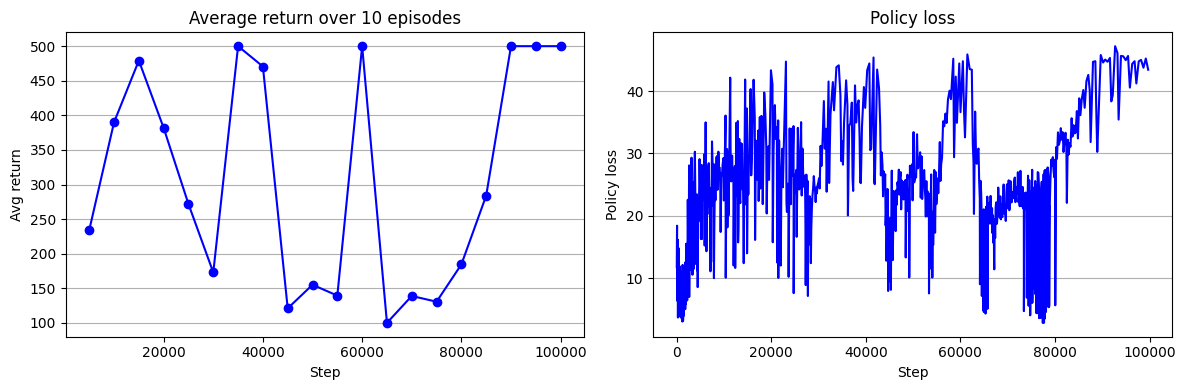

In [13]:
logger = pd.DataFrame(logger)
logger.columns = ['step', 'key', 'value']

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
key = 'Avg return'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'bo-')
ax.grid(axis='y')
ax.set_title("Average return over 10 episodes")
ax.set_xlabel("Step")
ax.set_ylabel("Avg return")

ax = fig.add_subplot(1, 2, 2)
key = 'policy_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Policy loss")
ax.set_xlabel("Step")
ax.set_ylabel("Policy loss")

fig.tight_layout()
plt.show()

<br>

---

## Ïó∞ÏÜç ÌñâÎèô Í≥µÍ∞Ñ

### ÌôòÍ≤Ω ÏïåÏïÑÎ≥¥Í∏∞

Ïù¥Î≤à Ï†àÏóêÏÑúÎäî Pendulum ÌôòÍ≤ΩÏùÑ ÌÜµÌï¥ Ïó∞ÏÜç ÌñâÎèô Í≥µÍ∞ÑÏóêÏÑú REINFORCEÍ∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÌòÑÎêòÎäîÏßÄ ÏïåÏïÑÎ≥º Í≤ÉÏù¥Îã§. 



In [14]:
env = gym.make('Pendulum-v1')
s, _ = env.reset()

print("The dimension of state space: ", env.observation_space.shape[0])
print("The dimension of action space: ", env.action_space.shape[0])
print("Initial state: ", s)


The dimension of state space:  3
The dimension of action space:  1
Initial state:  [-0.09988702  0.9949988  -0.32204962]


<br>

### Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÌòÑ

Î®ºÏ†Ä, Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Íµ¨ÌòÑÌï† Í≤ÉÏù¥Îã§. Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Îäî Í∞Å ÏÉÅÌÉúÎ•º ÏûÖÎ†• Î∞õÏïÑÏÑú ÌñâÎèô Í≥µÍ∞Ñ ÎÇ¥ Î™®Îì† ÌñâÎèôÏóê ÌôïÎ•†ÏùÑ Î∂ÄÏó¨Ìï† Ïàò ÏûàÏñ¥Ïïº ÌïúÎã§. ÌïòÏßÄÎßå, Ïó∞ÏÜç ÌñâÎèô Í≥µÍ∞ÑÏùò Í≤ΩÏö∞ ÌñâÎèôÏù¥ Î¨¥ÏàòÌûà ÎßéÏïÑÏÑú ÌäπÏ†ï ÌñâÎèôÏóê ÌôïÎ•†ÏùÑ Î∂ÄÏó¨Ìï† Ïàò ÏóÜÎã§. Ïó∞ÏÜç Í≥µÍ∞ÑÏùò Í≤ΩÏö∞ ÌôïÎ•† ÎåÄÏã† ÌôïÎ•† Î∞ÄÎèÑ Ìï®Ïàò (probability density function)Î•º ÏÇ¨Ïö©ÌïúÎã§. Ïö∞Î¶¨Îäî ÏÉÅÌÉúÏóê Îî∞Î•∏ ÌñâÎèôÏùò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Í≤ÉÏù¥Îã§. Îî∞ÎùºÏÑú ÏÉÅÌÉúÎ•º ÏûÖÎ†• Î∞õÏïÑ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Ï∂úÎ†•ÌïòÎäî Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÎßåÎì§Í≥†, Ï∂úÎ†•Îêú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Îî∞Î•¥Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ ÌñâÎèôÏùÑ ÏÉòÌîåÎßÅÌï† Í≤ÉÏù¥Îã§.

In [15]:
class MLPGaussianPolicy(nn.Module):
    def __init__(self, dim_state, dim_action, dim_hiddens=(512, ), activation_fn=F.relu):
        super(MLPGaussianPolicy, self).__init__()
        self.input_layer = nn.Linear(dim_state, dim_hiddens[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(dim_hiddens) - 1):
            hidden_layer = nn.Linear(dim_hiddens[i], dim_hiddens[i+1])
            self.hidden_layers.append(hidden_layer)
        self.mu_layer = nn.Linear(dim_hiddens[-1], dim_action)
        self.log_std_layer = nn.Linear(dim_hiddens[-1], dim_action)
        self.activation_fn = activation_fn
        
    def forward(self, s):
        s = self.activation_fn(self.input_layer(s))
        for hidden_layer in self.hidden_layers:
            s = self.activation_fn(hidden_layer(s))
            
        mu = self.mu_layer(s)
        log_std = torch.tanh(self.log_std_layer(s))
        
        return mu, log_std.exp()

<br>

Íµ¨ÌòÑÌïú Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏÑ†Ïñ∏ÌïòÎäî Î∞©Î≤ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.

In [16]:
env = gym.make('Pendulum-v1')

dim_state = env.observation_space.shape[0]
dim_action = env.action_space.shape[0]
dim_hiddens = (512, )
activation_fn = F.relu

policy = MLPGaussianPolicy(dim_state, dim_action, dim_hiddens, activation_fn)
policy

MLPGaussianPolicy(
  (input_layer): Linear(in_features=3, out_features=512, bias=True)
  (hidden_layers): ModuleList()
  (mu_layer): Linear(in_features=512, out_features=1, bias=True)
  (log_std_layer): Linear(in_features=512, out_features=1, bias=True)
)

<br>

Ï†ïÏ±Ö ÎÑ§Ìä∏ÏõåÌÅ¨Î°ú ÎßåÎì† ÌôïÎ•† Î∂ÑÌè¨ÏóêÏÑú ÌñâÎèôÏùÑ ÏÉòÌîåÎßÅÏùÄ Îã§ÏùåÍ≥º Í∞ôÏù¥ Ìï† Ïàò ÏûàÎã§. 
Í∞ÄÏû• ÎßàÏßÄÎßâÏóê hyperbolic tangent (`torch.tanh`)Îäî ÎΩëÌûå ÌñâÎèôÏù¥ -1Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ñÍ≤å ÎßåÎì§Ïñ¥Ï§ÄÎã§.
ÌôòÍ≤ΩÎßàÎã§ ÏÑ†ÌÉùÌï† Ïàò ÏûàÎäî ÌñâÎèôÏùò ÏµúÏÜåÍ∞íÍ≥º ÏµúÎåÄÍ∞íÏù¥ Îã§Î•∏Îç∞, ÌñâÎèôÏùÑ Î®ºÏ†Ä -1Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú ÎßåÎì§Ïñ¥ Ï§Ä ÌõÑ ÌñâÎèôÏùò Î≤îÏúÑÎ•º ÏïåÎßûÍ≤å Ï°∞Ï†àÌïòÎäî Í≤ÉÏù¥ Ìé∏ÌïòÎã§.

In [17]:
s, _ = env.reset()
s = torch.as_tensor(s, dtype=torch.float)

mu, std = policy(s)
a = torch.normal(mu, std)
a = torch.tanh(a)
a = a.cpu().detach().numpy()

max_action = env.action_space.high
min_action = env.action_space.low

a = 0.5 * (max_action - min_action) * (a + 1) + min_action

print("Selected action: ", a)


Selected action:  [-1.4023578]


```{note}
Îã´Ìûå Íµ¨Í∞Ñ $[m, M]$ÏóêÏÑú ÏÉòÌîåÎßÅÎêú ÌñâÎèô $x$Î•º $[-1, 1]$ ÏïàÏùò Í∞íÏúºÎ°ú Î∞îÍæ∏Îäî Î∞©Î≤ïÏùÄ Î®ºÏ†Ä min-max normalizationÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú $[0, 1]$Ïùò Í∞íÏúºÎ°ú Î≥ÄÌôòÌïú ÌõÑ 2Î•º ÌïòÍ≥† -1ÏùÑ ÎπºÏ£ºÎäî Î∞©ÏãùÏúºÎ°ú ÏßÑÌñâÎêúÎã§. Ï¶â,

$$x_{\text{norm}} = 2\frac{(x - m)}{(M - m)} - 1$$

Í∑∏Îüº $[-1, 1]$ÏúºÎ°ú normalizeÎêú Í∞í $x_{\text{norm}}$ÏùÑ Îã§Ïãú ÏõêÎûòÏùò Î≤îÏúÑ $[m, M]$Î°ú ÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Ïó∞ÏÇ∞Ïù¥ ÌïÑÏöîÌïòÎã§.

$$x = 0.5 \times \left( x_{\text{norm}} + 1 \right) \times (M - m) + m$$
```

<br>


### ÏóêÏù¥Ï†ÑÌä∏ Íµ¨ÌòÑ

Ïö∞Î¶¨Îäî ÏùºÎ∞òÏ†ÅÏù∏ ÏóêÏù¥Ï†ÑÌä∏Î•º Íµ¨ÌòÑÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞ÑÏóêÏÑú ÎßåÎì§ÏóàÎçò REINFORCEÏóê ÏΩîÎìúÎ•º Ï∂îÍ∞ÄÌïòÎäî Î∞©ÏãùÏùÑ ÏÑ†ÌÉùÌï† Í≤ÉÏù¥Îã§.
Ïù¥Î•º ÏúÑÌï¥ÏÑú `__init__()` Î©îÏÑúÎìúÏóêÏÑú `action_type` Ïù∏ÏûêÎ•º ÎÑòÍ≤® Î∞õÏùÑ Í≤ÉÏù¥Í≥†, `act()` Î©îÏÑúÎìúÏôÄ `learn()` Î©îÏÑúÎìúÏóêÏÑú `self.action_type` ÏÜçÏÑ±Ïóê Îî∞Îùº ÌñâÎèô ÏÑ†ÌÉù Î∞è ÌôïÎ•† Í≥ÑÏÇ∞ÏùÑ Îî∞Î°ú Ìï¥Ï§Ñ Í≤ÉÏù¥Îã§.

In [18]:
class REINFORCE:
    def __init__(self, policy, gamma=0.99, lr=0.001, action_type='continuous'):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.policy = policy.to(self.device)
        self.gamma = gamma
        self.action_type = action_type
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)
        self.buffer = []
        
    @torch.no_grad()
    def act(self, s, training=True):
        self.policy.train(training)

        s = torch.as_tensor(s, dtype=torch.float, device=self.device)
        if self.action_type == 'discrete':
            prob = self.policy(s)
            a = torch.multinomial(prob, 1) if training else torch.argmax(prob, dim=-1, keepdim=True)

        else:
            mu, std = self.policy(s)
            z = torch.normal(mu, std) if training else mu
            a = torch.tanh(z)

        return a.cpu().numpy()

    def learn(self):
        self.policy.train()
        s, a, r, _, _, _ = map(np.stack, zip(*self.buffer))
        s, a, r = map(lambda x: torch.as_tensor(x, dtype=torch.float, device=self.device), [s, a, r])
        a = a.long()
        r = r.unsqueeze(1)
        
        ret = torch.clone(r)
        for t in reversed(range(len(ret) - 1)):
            ret[t] += self.gamma * ret[t + 1]
            
        if self.action_type == 'discrete':
            probs = self.policy(s)
            log_probs = torch.log(probs.gather(1, a.long()))
        else:
            mu, std = self.policy(s)
            m = Normal(mu, std)
            z = torch.atanh(torch.clamp(a, -1.0 + 1e-7, 1.0 - 1e-7))
            log_probs = m.log_prob(z)
        
        policy_loss = - (ret * log_probs).mean()
        self.optimizer.zero_grad()
        policy_loss.backward()
        self.optimizer.step()
        
        result = {'policy_loss': policy_loss.item()}
        
        return result
        
    def process(self, transition):
        result = None
        self.buffer.append(transition)
        if transition[-1] or transition[-2]:
            result = self.learn()
            self.buffer = []
        return result


<br>

### ÏóêÏù¥Ï†ÑÌä∏ ÌõàÎ†®

Îã§ÏùåÏúºÎ°ú ÏóêÏù¥Ï†ÑÌä∏Î•º ÌõàÎ†®ÏãúÌÇ¨ Í≤ÉÏù¥Îã§. `CartPole`ÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÏΩîÎìúÏóêÏÑú `env.step()` Ìò∏Ï∂ú Î∂ÄÎ∂ÑÎßå Îã¨ÎùºÏßÑÎã§.
- GymnasiumÏùò Í≤ΩÏö∞, Ïù¥ÏÇ∞ ÌñâÎèô Í≥µÍ∞ÑÏùÑ Í∞ñÎäî ÌôòÍ≤ΩÏùÄ Ïä§ÏπºÎùº Í∞íÏùÑ Î∞õÎäî Î∞òÎ©¥Ïóê Ïó∞ÏÜç ÌñâÎèô Í≥µÍ∞ÑÏùÑ Í∞ñÎäî ÌôòÍ≤ΩÏùÄ Î∞∞Ïó¥ÏùÑ Î∞õÎäîÎã§. ÌïúÌé∏, Ïö∞Î¶¨Ïùò Ï†ïÏ±ÖÏùÄ Ìï≠ÏÉÅ Î∞∞Ïó¥ÏùÑ Î∞òÌôòÌï¥Ï§ÄÎã§. Îî∞ÎùºÏÑú `CartPole`ÏóêÏÑúÎäî Î∞∞Ïó¥Ïùò ÏõêÏÜåÎ•º Ïù∏ÏàòÎ°ú Ï£ºÍ∏∞ ÏúÑÌïòÏó¨ `env.step(a[0])` Ìò∏Ï∂úÌñàÏßÄÎßå, `Pendulum` ÌôòÍ≤ΩÏóêÏÑúÎäî ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ï£ºÎäî Î∞∞Ïó¥ÏùÑ Î∞îÎ°ú Ïù∏ÏàòÎ°ú ÎÑòÍ≤®Ï§ÄÎã§.
- Ïö∞Î¶¨Ïùò ÏóêÏù¥Ï†ÑÌä∏Îäî -1Í≥º 1ÏÇ¨Ïù¥Ïùò ÌñâÎèôÏùÑ Ï∑®ÌïúÎã§. ÌïòÏßÄÎßå `Gymnasium`Ïùò `Pendulum` ÌôòÍ≤ΩÏùò ÌñâÎèô Í≥µÍ∞ÑÏùÄ $[-2, 2]$Ïù¥Îã§. Îî∞ÎùºÏÑú, `env.step()`ÏóêÏÑú `2.0 * a`Î•º Ïù∏ÏàòÎ°ú ÎÑòÍ≤®Ï£ºÏóàÎã§. 

In [19]:
def evaluate(env_name, agent, eval_iterations):
    env = gym.make(env_name)
    scores = []
    for _ in range(eval_iterations):
        (s, _), terminated, truncated, score = env.reset(seed=np.random.randint(10000)), False, False, 0
        while not (terminated or truncated):
            a = agent.act(s, training=False)
            s_prime, r, terminated, truncated, _ = env.step(2.0 * a)
            score += r
            s = s_prime
        scores.append(score)
    env.close()
    return round(np.mean(scores), 4)

In [20]:
env_name = 'Pendulum-v1'

seed = 0
max_iterations = 1000000
eval_intervals = 5000
eval_iterations = 10
gamma = 0.95
lr = 0.0004

env = gym.make(env_name)
policy = MLPGaussianPolicy(dim_state, dim_action)
agent = REINFORCE(policy, gamma, lr)

logger = []
(s, _), terminated, truncated = env.reset(), False, False
for t in range(1, max_iterations + 1):
    a = agent.act(s)
    s_prime, r, terminated, truncated, _ = env.step(2.0 * a)
    result = agent.process((s, a, r, s_prime, terminated, truncated))
    s = s_prime
    
    if result is not None:
        logger.append([t, 'policy_loss', result['policy_loss']])
    
    if terminated or truncated:
        (s, _), terminated, truncated = env.reset(), False, False
        
    if t % eval_intervals == 0:
        score = evaluate(env_name, agent, eval_iterations)
        logger.append([t, 'Avg return', score])

ÌõàÎ†® Î°úÍ∑∏Î•º Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§. Í≤∞Í≥º Í∑∏ÎûòÌîÑÏóêÏÑú Ïïå Ïàò ÏûàÎäî Í≤ÉÏ≤òÎüº Îã®ÏàúÌïú REINFORCEÏúºÎ°úÎäî Pendulum ÌôòÍ≤ΩÏùÑ Ï†úÏñ¥ÌïòÍ∏∞ Ïñ¥Î†µÎã§. 
Ïù¥ÌõÑ Ïû•ÏóêÏÑú ÏóêÏù¥Ï†ÑÌä∏Î•º Ï°∞Í∏àÏî© Í∞úÏÑ†ÌïòÎ©∞ Pendulum ÌôòÍ≤ΩÏùÑ Ï†úÏñ¥Ìï¥Î≥¥Ïûê.

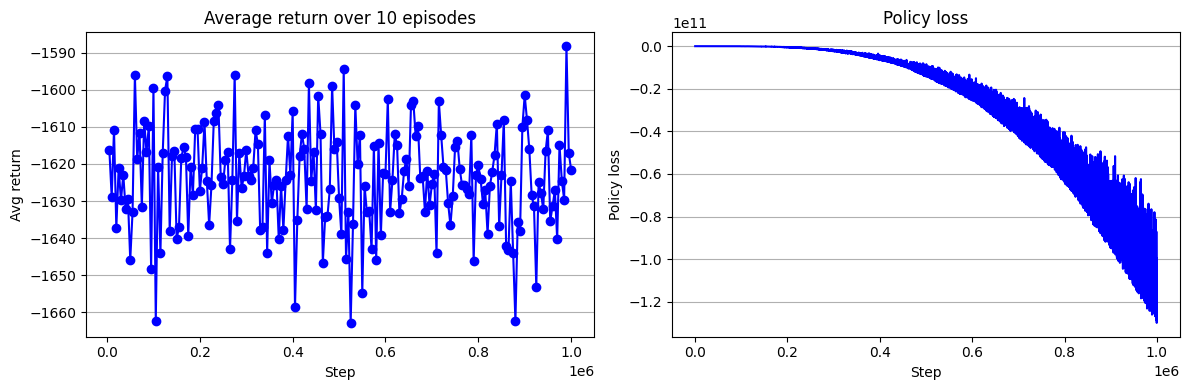

In [21]:
logger = pd.DataFrame(logger)
logger.columns = ['step', 'key', 'value']

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
key = 'Avg return'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'bo-')
ax.grid(axis='y')
ax.set_title("Average return over 10 episodes")
ax.set_xlabel("Step")
ax.set_ylabel("Avg return")

ax = fig.add_subplot(1, 2, 2)
key = 'policy_loss'
ax.plot(logger.loc[logger['key'] == key, 'step'], logger.loc[logger['key'] == key, 'value'], 'b-')
ax.grid(axis='y')
ax.set_title("Policy loss")
ax.set_xlabel("Step")
ax.set_ylabel("Policy loss")

fig.tight_layout()
plt.show()

```{raw} html
<script
   type="text/javascript"
   src="https://utteranc.es/client.js"
   async="async"
   repo="HiddenBeginner/Deep-Reinforcement-Learnings"
   issue-term="pathname"
   theme="github-light"
   label="üí¨ comment"
   crossorigin="anonymous"
/>
```